In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as j

In [144]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### There are no null values for all the features

In [4]:
#Descriptive statistics for categorical features
df.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [5]:
#Descriptive statistics for numerical features
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
for i in df.columns:
    print(f'{i}:\n{df[i].unique()}\n')

Car_Name:
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

#### There are too many Vehicle names, so we might drop the column instead of converting them into numerical variable.

In [7]:
df.drop(["Car_Name"],axis=1,inplace=True)

In [8]:
#Converting Year into numerical variable
df['Vehicle_Age']=2020-df['Year']
df.drop(['Year'],axis=1,inplace=True)

In [9]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [10]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Correlation

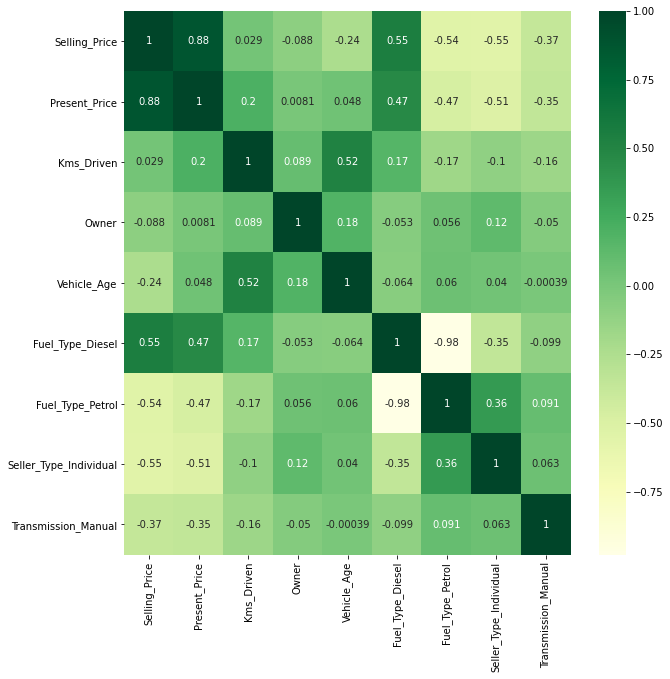

In [11]:
plt.figure(figsize=(10,10))
g=sns.heatmap(df.corr(),annot=True,cmap='YlGn')

#### The reason there is 98% correlation between Diesel & Petrol is because there are only two records of CNG and for rest of the records absence of Diesel represents presence of Petrol and very little presence of CNG

In [12]:
from sklearn.tree import ExtraTreeRegressor

In [13]:
Tree=ExtraTreeRegressor()

In [14]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
Tree.fit(X,y)

ExtraTreeRegressor()

In [18]:
imp_feat=pd.DataFrame(Tree.feature_importances_,index=X.columns,columns=['Importance'])
imp_feat.sort_values('Importance',ascending=False)

,Importance
Fuel_Type_Diesel,0.305079
Present_Price,0.231383
Transmission_Manual,0.211697
Seller_Type_Individual,0.154392
Vehicle_Age,0.074313
Kms_Driven,0.023109
Owner,0.000017
Fuel_Type_Petrol,0.000011


<AxesSubplot:>

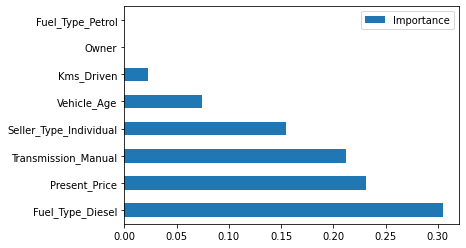

In [19]:
imp_feat.sort_values('Importance',ascending=False).plot(kind='barh')

#### We'll drop the Owner column due to its lowest importance

In [20]:
X.drop(['Owner'],axis=1,inplace=True)

### Random Forest

In [199]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.metrics import r2_score
import xgboost as xgb

In [87]:
RF=RandomForestRegressor()

In [63]:
params1={'n_estimators':[100,200,500,800,1000],
        'max_features':['auto','sqrt'],
        'max_depth':[int(x) for x in np.linspace(5, 30, num = 6)],
        'min_samples_split':[2, 5, 10, 15, 100],
        'min_samples_leaf':[1, 2, 5, 10]}

In [64]:
rcv=RandomizedSearchCV(RF,param_distributions=params1,n_jobs=-1,verbose=3,scoring='neg_mean_squared_error',cv=10)
rcv.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(max_depth=4,
                                                   min_samples_split=8,
                                                   n_estimators=200),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 500, 800,
                                                         1000]},
                   scoring='neg_mean_squared_error', verbose=3)

In [67]:
best_param1=rcv.best_estimator_.get_params()
RF=RandomForestRegressor(**best_param1)
best_param1

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [120]:
RF.fit(X_train,y_train)
RF.score(X_train,y_train)

0.9854447021417035

In [121]:
y_pred1=RF.predict(X_test)
r2=r2_score(y_test,y_pred1)
r2

0.9569776798732849

In [141]:
import pickle
file=open('RF.pkl','wb')
pickle.dump(RF,file)

### XGboost

In [89]:
XGB=XGBRegressor()

In [90]:
params2={'n_estimators':[100,200,500,800,1000],
         'learning_rate':[1,0.5,0.1,0.01,0.001],
         'max_depth': [3,5,10,20]}

In [91]:
rcv2=RandomizedSearchCV(XGB,param_distributions=params2,cv=10,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')
rcv2.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.7s finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...s=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                         

In [92]:
best_param2=rcv2.best_estimator_.get_params()
XGB=XGBRegressor(**best_param2)
best_param2

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [168]:
XGB.fit(X_train.values,y_train.values)
XGB.score(X_train.values,y_train.values)

0.9928919828440951

In [169]:
y_pred2=XGB.predict(X_test.values)
r2_XGB=r2_score(y_test.values,y_pred2)
r2_XGB

0.9593804100291253

In [225]:
j.dump(XGB,'XGB.dat')

['XGB.dat']